In [288]:
import pandas as pd
import warnings
from sodapy import Socrata
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


client = Socrata("data.ny.gov", None)

ds_dictionary = {
    'ridership': 'vxuj-8kew',
    'subway hourly ridership': 'wujg-7c2s',
    'bus hourly ridership': 'kv7t-n8in',
    'major felonies': 'yeek-jhmu',
    'summonses and arrests since 2019': '7tfn-twae'
}

time_column_dictionary = ('date', 'timestamp', 'month')

In [380]:
def get_dataset(ds_name, begin=None, before=None):
    sample = client.get(ds_dictionary[ds_name], limit=1)
    time_columns = [v for v in sample[0].keys() if v.lower().endswith(time_column_dictionary)]
    
    if len(time_columns) == 0:
        warnings.warn(f'No time column found: {sample[0].keys}')
        warnings.warn('Trying to get all rows for request all...')
        try:
            res_dict = client.get_all(ds_dictionary[ds_name])
            return pd.DataFrame.from_records(res_dict).dropna().reset_index(drop=True)
        except Exception as e:
            raise Exception(f"Couldn't get all rows. Too many? {e}")

    if len(time_columns) > 1:
        raise Exception(f'Too many time columns found: {sample.keys}')

    time_column = time_columns[0]
    where_string = f"{time_column} >= '{begin}'" if begin and not before else ''
    where_string = f"{time_column} < '{before}'" if not begin and before else ''
    where_string = f"{time_column} >= '{begin}' AND {time_column} < '{before}'" if begin and before else ''
    res_dict = client.get_all(ds_dictionary[ds_name], where=where_string, order=f'{time_column} ASC')
    return pd.DataFrame.from_records(res_dict).dropna().reset_index(drop=True)


In [392]:
# df = get_dataset('ridership', '2021-01-01', '2024-01-02')
df = get_dataset('ridership')

In [393]:
df.loc[df.date == '2023-08-20T00:00:00.000']

,date,subways_total_estimated_ridership,subways_of_comparable_pre_pandemic_day,buses_total_estimated_ridersip,buses_of_comparable_pre_pandemic_day,lirr_total_estimated_ridership,lirr_of_comparable_pre_pandemic_day,metro_north_total_estimated_ridership,metro_north_of_comparable_pre_pandemic_day,access_a_ride_total_scheduled_trips,access_a_ride_of_comparable_pre_pandemic_day,bridges_and_tunnels_total_traffic,bridges_and_tunnels_of_comparable_pre_pandemic_day,staten_island_railway_total_estimated_ridership,staten_island_railway_of_comparable_pre_pandemic_day
1267,2023-08-20T00:00:00.000,1870625,0.79,689829,0.62,101351,0.97,94332,0.91,18004,1.00,958807,1.04,2065,0.58


In [396]:
before = df.iloc[:1267]
after = df.iloc[1267:]

before.date = pd.to_datetime(before.date)
after.date = pd.to_datetime(after.date)

before.subways_total_estimated_ridership = before.subways_total_estimated_ridership.astype(float)
after.subways_total_estimated_ridership = after.subways_total_estimated_ridership.astype(float)

C:\Users\zclle\AppData\Local\Temp\ipykernel_16916\1281506127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before.date = pd.to_datetime(before.date)
C:\Users\zclle\AppData\Local\Temp\ipykernel_16916\1281506127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after.date = pd.to_datetime(after.date)
C:\Users\zclle\AppData\Local\Temp\ipykernel_16916\1281506127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

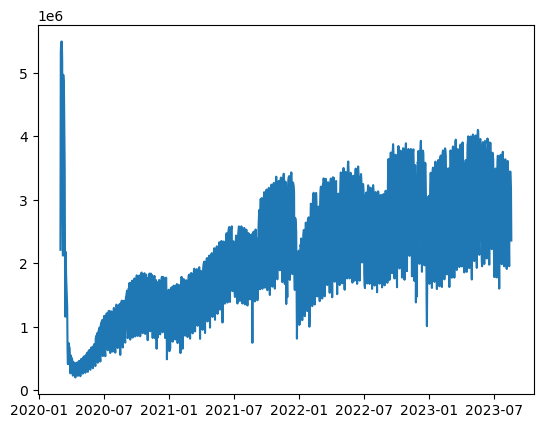

In [398]:
plt.plot(before.date, before.subways_total_estimated_ridership)

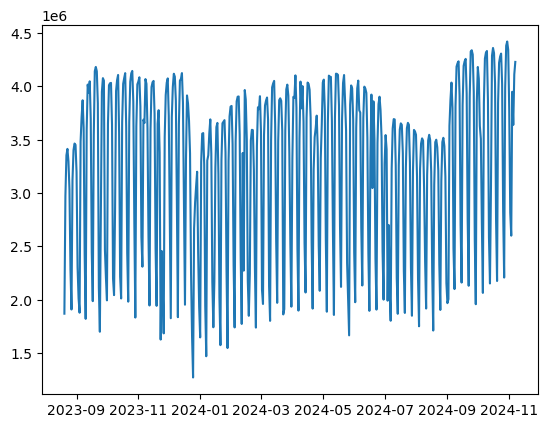

In [400]:
plt.plot(after.date, after.subways_total_estimated_ridership)